Nombre: David Díaz Paz y Puente | Mat: 650794

# Parcial 1

## Pregunta 1

El archivo "P1 Datos1.csv" contiene 500 observaciones de un estudio en que se trata de relacionar la cantidad de horas de estudio dedicadas por parcial, con la calificación obtenida en dicho periodo. Se te ha pedido que realices un estudio de inferencia y uno de predicción. Para el estudio de inferecia, crea un modelo de regresión lineal simple (prográmalo) utilizando todos los datos disponibles y trabaja los siguientes puntos:

Explica de forma clara y detallada la metodología utilizada para generar la regresión lineal simple (no hablo de explicar el código, sino explicar lo que pasa dentro de las funciones), asegúrate de describir mínimo la ecuación que describe al modelo, la métrica de error usada para optimizar los coeficientes, y el método de optimización utilizado.
A partir del modelo generado, describe el comportamiento de la población de forma detallada de dos formas distintas: una enfocada a un ambiente académico/estadístico, y otro enfocado a la población general.
Si calculas el p-value del coeficiente beta1 y lo comparas con el p-value del estadístico F, son iguales (no tienes que hacerlo, puedes creerme). ¿A qué crees que se debe esto? Explícalo de forma clara y detallada.
Para el estudio de predicción, no necesitas programar nada adicional (pero puedes hacerlo si así lo deseas). Solamente responde las siguientes preguntas:

Si fueras a programar este experimento para mostrar resultados al público, indica claramente qué cambios realizarías al código que tienes actualmente, y por qué.
¿Qué métrica o métricas usarás para hablar de la calidad del modelo?, ¿por qué?, ¿cómo la o las calcularías?
Basándote solamente en los datos que se te dieron (no consideres los resultados del estudio de inferencia ni en los del estudio de predicción si es que lo programaste), ¿consideras que una metodología de regresión no lineal podría generar una mejor predicción? Responde dicha pregunta para una regresión polinomial de segundo orden, una regresión polinomial de tercer orden, una regresión spline, y KNN para regresión (con k = 3 y con k = 300). Para cada caso indica si crees que sí o que no, y por qué.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Horas         500 non-null    int64  
 1   Calificacion  500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


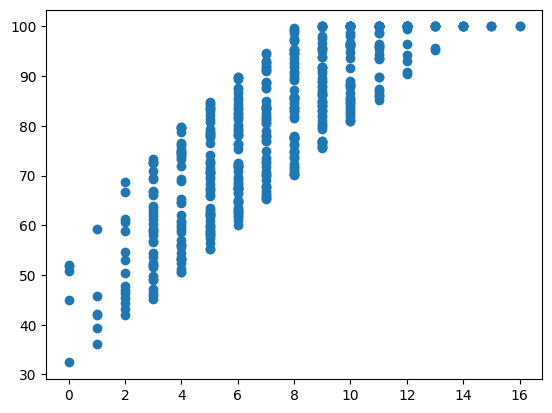

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('P1 Datos1.csv')

print(df.info())

plt.scatter(df['Horas'], df['Calificacion'])

In [20]:
import numpy as np

x = df["Horas"].to_numpy(dtype=float)
y = df["Calificacion"].to_numpy(dtype=float)

# Metodo 1: formula cerrada (tu enfoque)
xBar = np.mean(x)
yBar = np.mean(y)
B1 = np.sum((x - xBar) * (y - yBar)) / np.sum((x - xBar) ** 2)
B0 = yBar - (B1 * xBar)

# Metodo 2: minimos cuadrados por algebra lineal (equivalente a minimizar RSS)
X = np.column_stack([np.ones_like(x), x])
beta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
B0_ls, B1_ls = beta

# Prediccion y errores (para documentar RSS/MSE/RMSE/R2)
yHat = B0 + B1 * x
e = y - yHat
RSS = np.sum(e**2)
MSE = RSS / len(x)
RMSE = np.sqrt(MSE)
TSS = np.sum((y - yBar) ** 2)
R2 = 1 - (RSS / TSS)

B0, B1, B0_ls, B1_ls, RSS, MSE, RMSE, R2


(np.float64(48.07005444261577),
 np.float64(4.257566455755204),
 np.float64(48.07005444261576),
 np.float64(4.257566455755207),
 np.float64(36399.39696370549),
 np.float64(72.79879392741098),
 np.float64(8.532220925844044),
 np.float64(0.7015346576331934))

Con esa salida, lo que tienes (en el orden que imprime el código) es:

* **B0 = 48.0700544426**
  Intercepto del modelo. Interpretación: si **Horas = 0**, el modelo estima una **Calificacion promedio ~ 48.07**. En la práctica, si casi no hay datos cerca de 0 horas, este valor sirve más como “ancla” matemática que como predicción realista.

* **B1 = 4.2575664558**
  Pendiente del modelo. Interpretación: por **cada hora adicional de estudio**, la calificación **aumenta en promedio ~ 4.26 puntos**, según la tendencia lineal observada en los datos.

* **B0_ls = 48.0700544426** y **B1_ls = 4.2575664558**
  Son los mismos coeficientes pero calculados con `np.linalg.lstsq` (mínimos cuadrados matricial). Que coincidan (salvo redondeo) confirma que tu fórmula cerrada y el método de optimización están resolviendo exactamente el mismo problema OLS.

* **RSS = 36399.3969637**
  Suma de cuadrados de los residuos: $(\sum (y_i-\hat y_i)^2)$. Es el “error total” acumulado del modelo sobre los 500 puntos. Por sí solo no es tan intuitivo porque depende de la escala y del tamaño de la muestra, pero sirve para comparar modelos sobre el mismo dataset (más bajo = mejor ajuste).

* **MSE = 72.7987939274**
  Error cuadrático medio: (RSS/n). Interpretación: el modelo tiene un error cuadrático promedio de ~72.80 (en unidades “puntos²”). Es más comparable que RSS porque ya está normalizado por el número de observaciones.

* **RMSE = 8.5322209258**
  Raíz del MSE. Interpretación: el error típico de predicción del modelo es de **~ 8.53 puntos** en la calificación. O sea, una predicción comúnmente podría “fallar” alrededor de 8–9 puntos (aprox., en promedio).

* **R² = 0.7015346576**
  Coeficiente de determinación. Interpretación: el modelo lineal con horas de estudio explica aproximadamente **70.15%** de la variabilidad observada en la calificación; el ~29.85% restante se debe a otros factores (hábitos, dificultad del parcial, calidad del estudio, etc.) o ruido.

A continuación se presenta la ecuación considerada para generar el modelo de regresión lineal y los respectivos coeficientes, dados los datos presentados. Después se expone la ecuación resultante. 

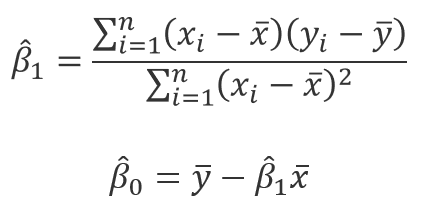

Modelo resultante: $y = 48.07 + 4.26x$

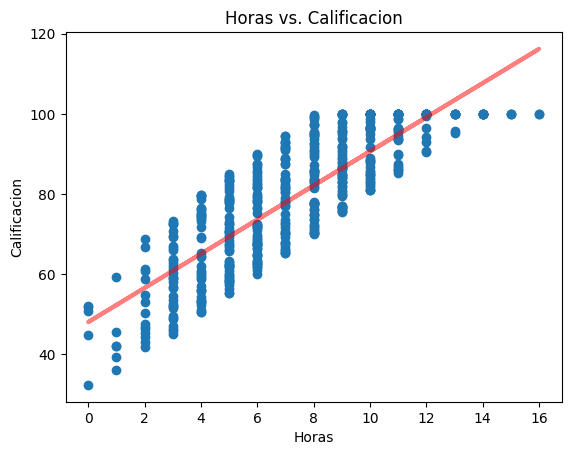

In [17]:
plt.scatter(x, y)
plt.ylabel("Calificacion")
plt.xlabel("Horas")
plt.title("Horas vs. Calificacion")
yHat = B0 + B1*x
plt.plot(x, yHat, c = "r", linewidth = 3, alpha = 0.5)
plt.show()

Finalmente, para presentar el experimento al publico yo cambiaria el notebook a un flujo mas claro y robusto (cargar datos, ajustar el modelo, evaluar y predecir), agregando validaciones de columnas/valores y una salida sencilla donde el usuario ingrese horas y reciba una calificacion estimada junto con una grafica de la recta y el punto predicho. Para hablar de la calidad del modelo usaria RMSE (error tipico en puntos), MAE (error promedio absoluto) y R² (proporcion de variabilidad explicada), calculandolos idealmente con un esquema train/test para no evaluar solo con los mismos datos de entrenamiento. Finalmente, basandome solo en la forma general de la nube de puntos, una regresion no lineal no parece necesaria si la tendencia es aproximadamente lineal: un polinomio de 2º/3º y splines agregan complejidad y riesgo de sobreajuste sin evidencia clara de curvatura, KNN con k=3 seria muy inestable (mucho ruido) y con k=300 suavizaria demasiado (perdiendo la relacion), por lo que el enfoque lineal sigue siendo el mas razonable para este conjunto de datos.

## Pregunta 2

Estás trabajando en un proyecto enfocado en predecir el precio de una casa con base en distintas variables. En el archivo "P1 Datos2.csv" encontrarás 50 observaciones con la siguiente información:

ft2. Tamaño de la casa <br>
m2. Tamaño de la casa<br>
fibra. Si tienen fibra óptica en la casa<br>
banos. Cantidad de baños en la casa<br>
precio. Precio de la casa<br>
Responde:<br>

Identifica qué problema o problemas de los planteados en el curso están presentes en la base de datos. Si programas, se espera que indiques por qué se eligió el valor asignado a cualquiera de los parámetros relevantes del código. Si para identificar algún problema no necesitaste programar, indica cómo llegaste a la conclusión generada. Si para resolver alguno de los problemas necesitaras mayor información, indícalo claramente.
Indica cómo resolverías cada uno de los problemas que identificaste que necesitaban corregirse (puedes dividir algún problema en subproblemas si lo consideras necesario), de forma específica a la base de datos en cuestión, y por qué consideras que esa la mejor solución en este caso. No tienes que realizar las correcciones, solamente explicar qué harías.
Un miembro del equipo tomó un porcentaje alto de los datos que le diste posterior a la solución de problemas y los utilizó para generar una regresión lineal múltiple con solo dos de las variables del sistema y generó la tabla de resultados que se muestra abajo (los resultados no coincidirán con los que obtendrías si tu realizaras el proceso, se manipularon intencionalmente). Comenta sobre la calidad y capacidad del modelo para realizar predicciones y de la relevancia de cada una de las variables utilizadas, enfocándote en una o varias de las métricas que allí se muestran y explicando si te parece necesario conocer alguna métrica que allí no aparece.
Independientemente de si el modelo es bueno o no, asume por un momento que el modelo tiene la mejor calidad del mundo. A partir de dicha suposición, explica de forma clara y concisa, basada en estadística, lo que los coeficientes del modelo sugieren, utilizando el nivel de confianza que desees.


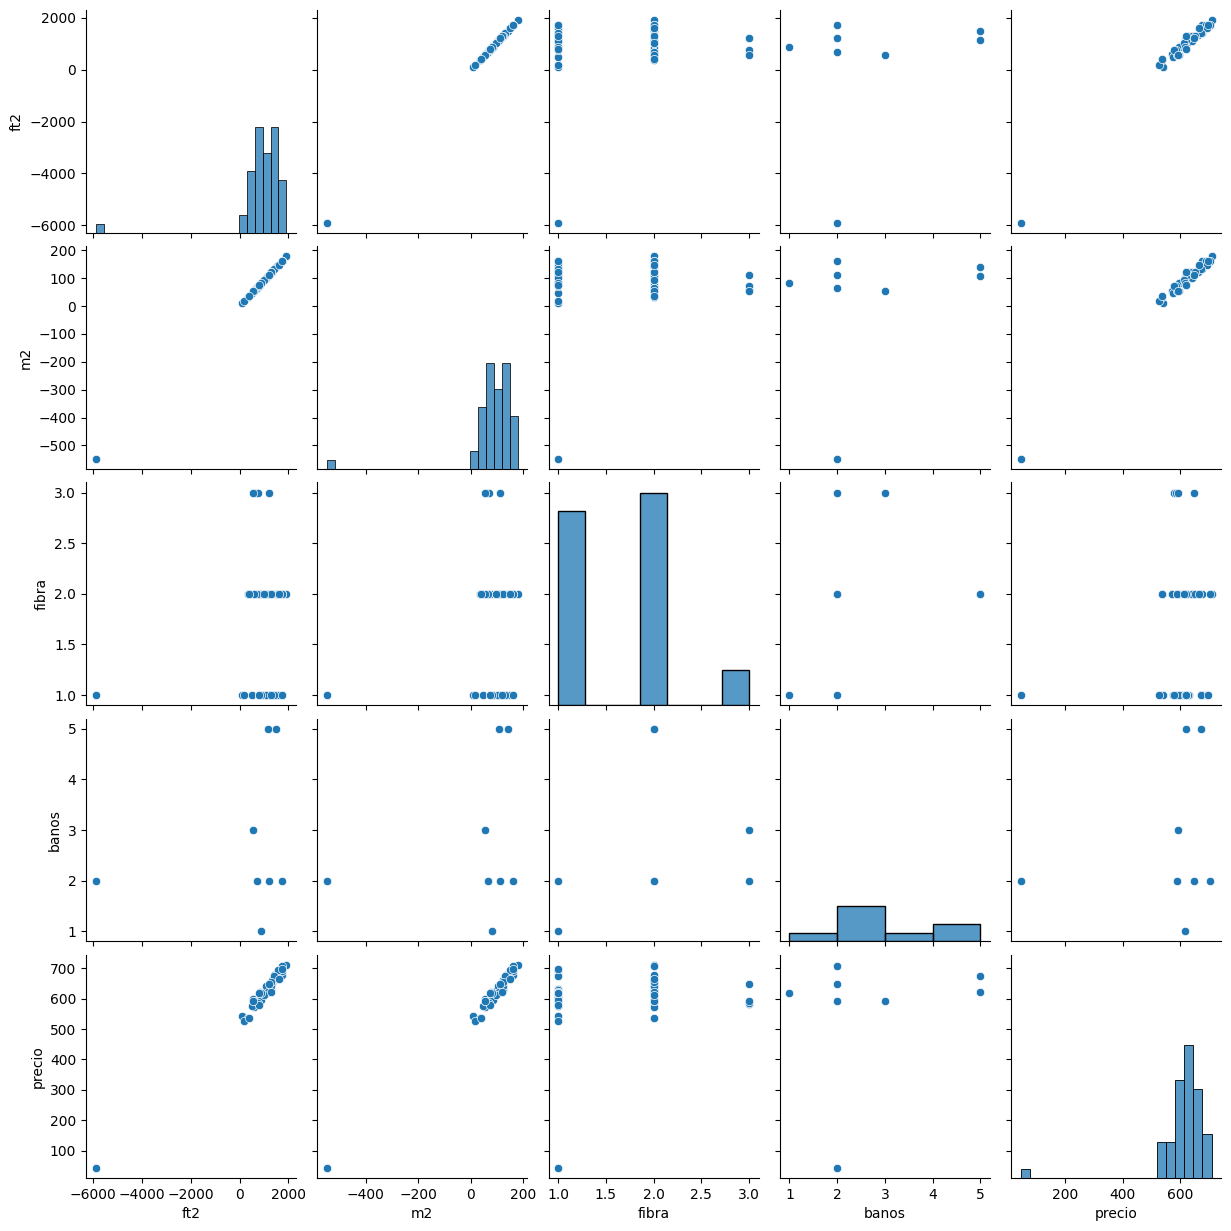

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
df2 = pd.read_csv('P1 Datos2.csv')
sns.pairplot(df2[['ft2', 'm2', 'fibra', 'banos', 'precio']])
plt.show()

Respuesta: 

1) Problemas presentes:

- Multicolinealidad / redundancia: tienes ft2 y m2, que representan el mismo tamaño en unidades distintas (1 m² ≈ 10.7639 ft²).
- Datos faltantes o filtrados: Hay 1 fila donde faltan m2 y ft2 (pero sí trae precio), y además banos está 84% vacío (42 de 50), lo cual es crítico porque ya no puedes usar esa variable con confianza (quedaría un modelo con muy pocos datos si la exiges).
- Valores inválidos / outliers: existe una observación con m2 y ft2 negativos (imposible físicamente) y un precio extremadamente bajo (muy separado del resto), lo que sugiere error de captura o unidades

2) Cómo resolver problemas presentes: 

- ft2 vs m2 (redundancia/multicolinealidad): elegir solo una variable de tamaño para el modelo y verificar consistencia. 
- Para la fila donde faltan las variables m2 y ft2, eliminaría la observación o aplicaría un algoritmo KNN para rellenar los datos dado a que solamente es un dato por variable el que falta (esto también conllevaría riesgos debido a que es una base de datos relativamente pequeña, pero es una alternativa). Por otra parte, descartaría la variable baños para el modelo principal y reconstruir los datos a partir de la fuente original debido a la gran relativa falta de datos que presenta. 
- Si se confirma que es un error de captura en la base de datos para las medidas negativas, cambiaría el signo. De no ser así, repararía el hueco reemplazandola por una observación artificial creada a partir de una media o un KNN, o de última alternativa sería eliminar la observación (esto también dado que la variable de precio pequeño coincide con la observación de medidas negativas, entonces sería eliminar 3 outliers eliminando una observación).

3) Calidad del modelo

Dado a que la tabla OLS mostrada usa 49 observaciones concuerda con la base donde hay exactamente 1 fila sin m2/ft2, asumimos que esas son las variables seleccionadas. R²≈0.977 es muy alto y sugiere que el tamaño (m2) explica gran parte del precio, esto coincide con su p-value de 0.000 lo que hace a esta variable significativa para el modelo. Por otro lado la variable fibra aparece con p-value de 0.94 y un intervalo de confianza que cruza 0 ampliamente, así que no hay evidencia estadística de que aporte señal en ese modelo. Aún así habría que considerar si la variable fibra fue tratada como categórica o no, donde se deberían de haber utilizado dummies. 

Con eso, el modelo podría seguir siendo bueno por m2, pero la conclusión sobre fibra y la estabilidad del ajuste dependería de corregir el outlier y de validar con datos no vistos.

4) Escenario perfecto

El número de m2 (0.9267) nos dice que, si todo lo demás se mantiene igual, por cada 1 m² extra de casa, el precio sube en promedio 0.9267 (en la unidad en la que esté el precio: pesos, miles de pesos, etc.). En otras palabras: casas más grandes → más caras, y ese efecto se ve muy claro en el modelo.

El número llamado constante (533.9) es como un “punto de arranque” del modelo. Representa el precio estimado cuando m2 = 0 y fibra está en su valor base. Como una casa de 0 m² no existe, esa constante no se interpreta como un precio real, solo es parte de la fórmula para que el modelo funcione.

Para fibra (-0.3345), el significado depende de cómo esté escrita esa variable. Si fibra fuera 0 = no tiene y 1 = sí tiene, entonces el modelo diría que tener fibra cambia el precio en -0.3345 (o sea, casi nada) cuando el tamaño es el mismo. Pero en la base fibra tiene valores 1, 2 y 3, así que el modelo está tratando a fibra como si fuera un número “por niveles”. Eso significaría que subir un nivel (de 1 a 2, o de 2 a 3) cambia el precio en -0.3345, lo cual solo tiene sentido si esos niveles realmente representan un orden claro.Finalmente, como en la tabla el efecto de fibra sale con mucha incertidumbre (su intervalo incluye el 0), la idea correcta sería: con estos resultados no hay evidencia fuerte de que la fibra cambie el precio.